### Salary_Prediction_Simple_Linear_Regression

#### Problem Statement:-

A company wants to understand the relationship between an employee's years of experience and their corresponding salary.  believes that there might be a linear relationship between an employee's years of experience and their salary, and want to build a simple linear regression model to predict salaries for new hires based on their years of experience.

The objective of this project is to develop a simple linear regression model that can accurately predict the salary of new employees based on the number of years of experience they possess. The model will be trained using the available data on current employees.

#### Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing the Data:-

In [2]:
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# See the top 5 records
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
# See the shape of our data
data.shape

(30, 2)

There are 30 rows and 2 columns in our data

In [6]:
# See is there any duplicate row is there
data.duplicated().sum()

0

In [7]:
# See is there any null value is there or not
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# See data type of variable
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
# see information of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# See statestical analysis of variable
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

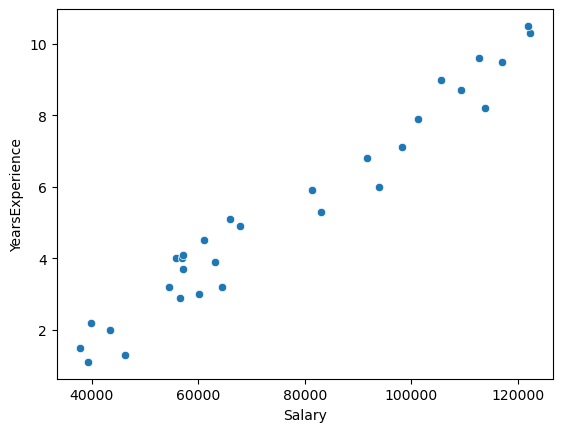

In [11]:
sns.scatterplot(data['Salary'],data['YearsExperience'])

From above scatterplot we can see that Years of experience and salary are strongly correlated

In [12]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Here, also by using corr() function we see that strong possitive correlation between these two variables.

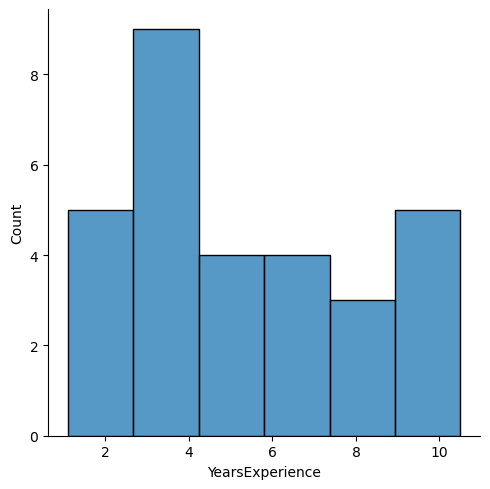

In [13]:
# Distribution plot for 'YearsExperience'
sns.displot(data.YearsExperience, kind = 'hist')

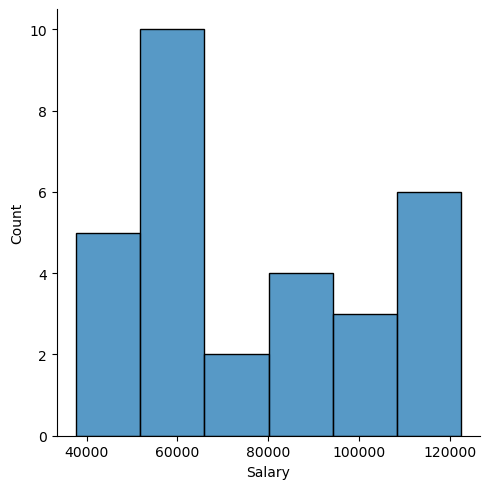

In [14]:
sns.displot(data.Salary,kind='hist')

In [15]:
# See skewness 
data.YearsExperience.skew() 

0.37956024064804106

skewness is less than 0.5 that means our data is not skewed

In [16]:
data.Salary.skew() 

0.35411967922959153

<AxesSubplot:xlabel='YearsExperience'>

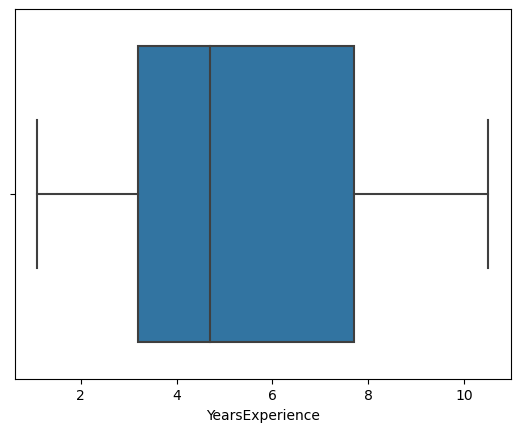

In [17]:
# Outlier detection 
sns.boxplot(data.YearsExperience)     

From above boxplot we can see that there is no any outlier in our data

#### Separating Dependent variable from dataframe

In [18]:
x=data['YearsExperience']
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [19]:
y=data['Salary']
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

'x' will contain the independent variable and 'y ' will contain all dependent variable

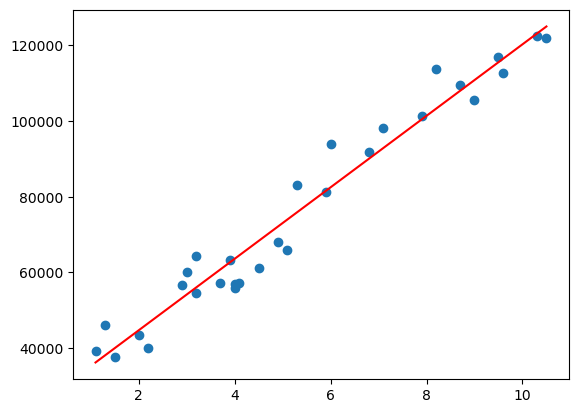

In [20]:
# To plot a linear Regression(Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(x,y)
m,b = np.polyfit(x,y,1)     # m- slope, b-intercept
plt.plot(x,m*x + b, 'r')

#### Spliting data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [22]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

#### Performing Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Fitting of model
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
# Predicting the Salary for the Test values
Y_pred=lr.predict(X_test)

#### Performance Metrics

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [29]:
print('MSE: ', mean_squared_error(Y_test,Y_pred))
print('MAE: ', mean_absolute_error(Y_test,Y_pred))
print('R-Square:', r2_score(Y_test, Y_pred))

MSE:  29792090.60568413
MAE:  4978.979135446681
R-Square: 0.9593374475037184


In [30]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 24976.501152737757
Coefficient of the line: [9713.02017291]


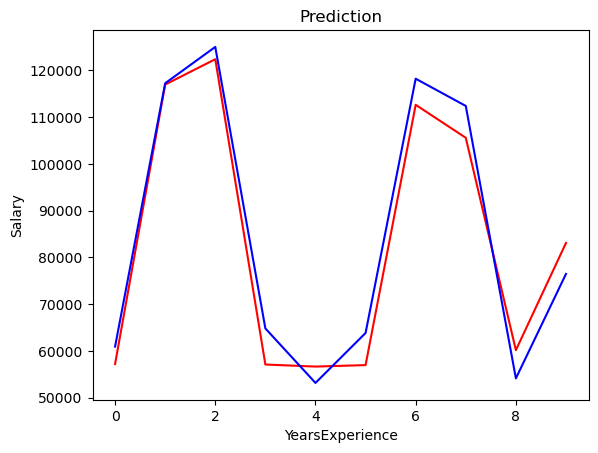

In [32]:
# Plotting the actual and predicted values    
c = [i for i in range (len(Y_test))]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,Y_pred,color='b',linestyle='-')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

Our Model able to read approximately 95% variablity of our data or understand the data.